# Transient State

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


--- เมทริกซ์การเปลี่ยนสถานะ (P) ---


<IPython.core.display.Math object>


### การคำนวณสภาวะการเปลี่ยนแปลง (Transient State)
สถานะเริ่มต้น (เดือนที่ 0): โตโยต้า (Toyota)=10000 คน, ฮอนด้า (Honda)=10000 คน
จำลองเหตุการณ์ไปข้างหน้า 10 เดือน...

--- เดือนที่ 1 ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

  ผลลัพธ์: โตโยต้า (Toyota) = 13000.00 คน, ฮอนด้า (Honda) = 7000.00 คน
  (ผลลัพธ์นี้ตรงกับตัวอย่าง 9.2: [13000, 7000])
--- เดือนที่ 2 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 13900.00 คน, ฮอนด้า (Honda) = 6100.00 คน
--- เดือนที่ 3 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14170.00 คน, ฮอนด้า (Honda) = 5830.00 คน
--- เดือนที่ 4 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14251.00 คน, ฮอนด้า (Honda) = 5749.00 คน
--- เดือนที่ 5 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14275.30 คน, ฮอนด้า (Honda) = 5724.70 คน
--- เดือนที่ 6 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14282.59 คน, ฮอนด้า (Honda) = 5717.41 คน
--- เดือนที่ 7 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14284.78 คน, ฮอนด้า (Honda) = 5715.22 คน
--- เดือนที่ 8 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14285.43 คน, ฮอนด้า (Honda) = 5714.57 คน
--- เดือนที่ 9 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14285.63 คน, ฮอนด้า (Honda) = 5714.37 คน
--- เดือนที่ 10 ---
  ผลลัพธ์: โตโยต้า (Toyota) = 14285.69 คน, ฮอนด้า (Honda) = 5714.31 คน

### กราฟแสดงการเปลี่ยนแปลง (Transient Plot)


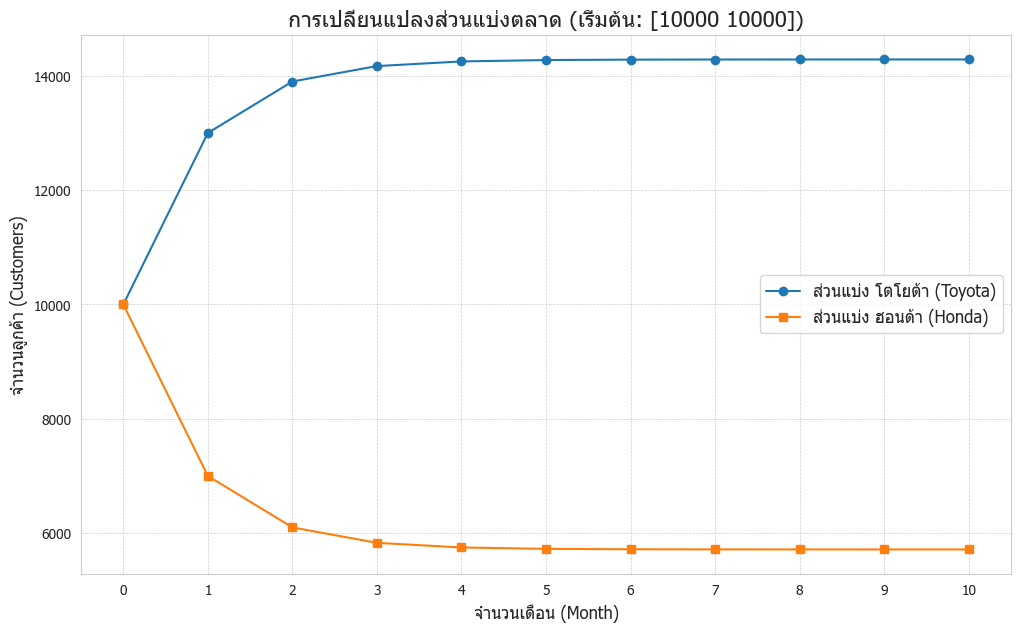

In [11]:
# ==============================================================================
# ### 📈 เซลล์ที่ 1: สภาวะการเปลี่ยนแปลง (Transient State) (แสดงผล LaTeX)
# ==============================================================================
#
# คำนวณการเปลี่ยนแปลงส่วนแบ่งตลาดในแต่ละเดือน (Month-by-Month)
# โดยแสดงผลสมการและเมทริกซ์ด้วย LaTeX

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Math # 👈 **สำคัญ: สำหรับแสดงผล LaTeX**

# --- 1. ตั้งค่าพื้นฐาน (Setup) ---
sns.set_style("whitegrid")
try:
    plt.rcParams["font.family"] = "Tahoma"
except:
    print("ไม่พบฟอนต์ Tahoma, ใช้ฟอนต์เริ่มต้น")

# --- 💡 ฟังก์ชันช่วยแปลง Array เป็น LaTeX ---
def show_latex(latex_string):
    """Helper to display a LaTeX string."""
    display(Math(latex_string))

def to_b(arr):
    """
    แปลง numpy array (1D หรือ 2D) ให้เป็น string ของ LaTeX bmatrix
    ใช้ :g (general format) เพื่อให้แสดงผลทั้งเลข 10000 และ 0.8 ได้สวยงาม
    """
    if arr.ndim == 1:
        arr = np.atleast_2d(arr) # แปลง [a, b] ให้เป็น [[a, b]]
    
    latex = r"\begin{bmatrix}"
    for row in arr:
        # 'g' format ดีที่สุดสำหรับแสดงผลทั้ง int (10000) และ float (0.8)
        latex += " & ".join([f"{x:g}" for x in row])
        latex += r" \\ " # ขึ้นบรรทัดใหม่ใน LaTeX
    
    latex = latex.rstrip(r" \\ ") # ลบ \\ สุดท้าย
    latex += r"\end{bmatrix}"
    return latex
# --- จบฟังก์ชันช่วย ---


# --- 2. กำหนดค่าจากโจทย์ (Problem Definition) ---
states = ["โตโยต้า (Toyota)", "ฮอนด้า (Honda)"]

# เมทริกซ์การเปลี่ยนสถานะ (P)
P = np.array([
    [0.8, 0.2],  # แถว 0: จาก โตโยต้า
    [0.5, 0.5]   # แถว 1: จาก ฮอนด้า
])

print("--- เมทริกซ์การเปลี่ยนสถานะ (P) ---")
# 💡 ใช้ LaTeX แสดงผลเมทริกซ์ P
show_latex(to_b(P))


# --- 3. การคำนวณ Transient State (แบบตัวอย่าง 9.2) ---
print("\n" + "="*60)
print("### การคำนวณสภาวะการเปลี่ยนแปลง (Transient State)")

# --- 🔧 ค่าที่กำหนดไว้ (Hard-coded values) ---
initial_counts = np.array([10000, 10000])
n_months_to_simulate = 10
# --- 

print(f"สถานะเริ่มต้น (เดือนที่ 0): {states[0]}={initial_counts[0]} คน, {states[1]}={initial_counts[1]} คน")
print(f"จำลองเหตุการณ์ไปข้างหน้า {n_months_to_simulate} เดือน...\n")

# สร้าง list เพื่อเก็บประวัติการเปลี่ยนแปลง
history_transient = [initial_counts]
current_v = initial_counts

for month in range(1, n_months_to_simulate + 1):
    # คำนวณสถานะถัดไป: v_next = v_current * P
    next_v = np.dot(current_v, P)
    
    print(f"--- เดือนที่ {month} ---")
    
    # --- ✍️ อธิบายการคูณเมทริกซ์ (แบบไดนามิกด้วย LaTeX) ---
    if month == 1 and np.array_equal(initial_counts, [10000, 10000]):
        
        # \text{} ใช้สำหรับแสดงผลภาษาไทยในโหมดคณิตศาสตร์
        show_latex(r"\text{--- 💡 อธิบายการคำนวณ (สมการ 9.2) ---}")
        
        # สร้างสมการ [v_ปัจจุบัน] x [P] = [v_ถัดไป]
        v_curr_str = to_b(current_v)
        P_str = to_b(P)
        v_next_str = to_b(next_v)
        # \times คือเครื่องหมายคูณ
        show_latex(rf"{v_curr_str} \times {P_str} = {v_next_str}")
        
        show_latex(r"\text{หลักการ: แถว x คอลัมน์ (Row x Column)}")
        
        # --- การคำนวณหาโตโยต้า (คอลัมน์ที่ 1) ---
        show_latex(rf"\text{{การคำนวณหา '{states[0]}' ใหม่ (คอลัมน์ที่ 1 ของ P):}}")
        # (10000 * 0.8) + (10000 * 0.5)
        s1 = rf"= ({current_v[0]:g} \times {P[0, 0]:g}) + ({current_v[1]:g} \times {P[1, 0]:g})"
        show_latex(s1)
        # = 8000 + 5000 = 13000
        s2 = rf"= {current_v[0] * P[0, 0]:g} + {current_v[1] * P[1, 0]:g} = {next_v[0]:g}"
        show_latex(s2)
        
        # --- การคำนวณหาฮอนด้า (คอลัมน์ที่ 2) ---
        show_latex(rf"\text{{การคำนวณหา '{states[1]}' ใหม่ (คอลัมน์ที่ 2 ของ P):}}")
        # (10000 * 0.2) + (10000 * 0.5)
        s3 = rf"= ({current_v[0]:g} \times {P[0, 1]:g}) + ({current_v[1]:g} \times {P[1, 1]:g})"
        show_latex(s3)
        # = 2000 + 5000 = 7000
        s4 = rf"= {current_v[0] * P[0, 1]:g} + {current_v[1] * P[1, 1]:g} = {next_v[1]:g}"
        show_latex(s4)
        
        show_latex(r"\text{----------------------------------------------}")
    
    # แสดงผลลัพธ์เป็นข้อความปกติ
    print(f"  ผลลัพธ์: {states[0]} = {next_v[0]:.2f} คน, {states[1]} = {next_v[1]:.2f} คน")
    if month == 1 and np.array_equal(initial_counts, [10000, 10000]):
        print(f"  (ผลลัพธ์นี้ตรงกับตัวอย่าง 9.2: [13000, 7000])")
        
    # อัปเดตค่าสำหรับรอบถัดไป
    history_transient.append(next_v)
    current_v = next_v

# แปลง history เป็น numpy array สำหรับ plot
history_transient = np.array(history_transient)

# --- 4. การแสดงผลด้วยกราฟ (Visualization) ---
# (ส่วนนี้เหมือนเดิม)
print("\n" + "="*60)
print("### กราฟแสดงการเปลี่ยนแปลง (Transient Plot)")

plt.figure(figsize=(12, 7))
plt.plot(history_transient[:, 0], label=f"ส่วนแบ่ง {states[0]}", marker='o', linestyle='-')
plt.plot(history_transient[:, 1], label=f"ส่วนแบ่ง {states[1]}", marker='s', linestyle='-')
plt.title(f"การเปลี่ยนแปลงส่วนแบ่งตลาด (เริ่มต้น: {initial_counts})", fontsize=16)
plt.xlabel("จำนวนเดือน (Month)", fontsize=12)
plt.ylabel("จำนวนลูกค้า (Customers)", fontsize=12)
plt.xticks(range(n_months_to_simulate + 1))
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Steady State

In [15]:
# ==============================================================================
# ### ⚖️ เซลล์ที่ 2: สภาวะคงตัว (Steady State) (แสดงผล LaTeX)
# ==============================================================================
#
# คำนวณหาส่วนแบ่งตลาด "ในระยะยาว" หรือ "จุดสมดุล"
# โดยแสดงผลสมการและเมทริกซ์ด้วย LaTeX

import numpy as np
from IPython.display import display, Math # 👈 **สำคัญ: สำหรับแสดงผล LaTeX**

# --- 💡 ฟังก์ชันช่วยแปลง Array เป็น LaTeX ---
def show_latex(latex_string):
    """Helper to display a LaTeX string."""
    display(Math(latex_string))

def to_b(arr):
    """
    แปลง numpy array (1D หรือ 2D) ให้เป็น string ของ LaTeX bmatrix
    ใช้ :g (general format) เพื่อให้แสดงผลทั้งเลข 10000 และ 0.8 ได้สวยงาม
    """
    if arr.ndim == 1:
        arr = np.atleast_2d(arr) 
    
    latex = r"\begin{bmatrix}"
    for row in arr:
        latex += " & ".join([f"{x:g}" for x in row])
        latex += r" \\ " 
    
    latex = latex.rstrip(r" \\ ") 
    latex += r"\end{bmatrix}"
    return latex
# --- จบฟังก์ชันช่วย ---


# --- 1. กำหนดค่าจากโจทย์ (Problem Definition) ---
states = ["โตโยต้า (Toyota)", "ฮอนด้า (Honda)"]

# เมทริกซ์การเปลี่ยนสถานะ (P)
P = np.array([
    [0.8, 0.2],  # แถวที่ 0: ลูกค้าโตโยต้า
    [0.5, 0.5]   # แถวที่ 1: ลูกค้าฮอนด้า
])

# --- 🔧 ค่าที่กำหนดไว้ (Hard-coded values) ---
total_customers = 20000
# ---

print("--- เมทริกซ์การเปลี่ยนสถานะ (P) ---")
# 💡 ใช้ LaTeX แสดงผลเมทริกซ์ P
show_latex(to_b(P))

print(f"\nจำนวนลูกค้ารวมในตลาด: {total_customers} คน")
# 💡 \pi คือสัญลักษณ์ "พาย" (pi)
show_latex(r"\text{กำลังค้นหาส่วนแบ่งตลาด } (\pi) \text{ ที่ } \pi = \pi \cdot P")


# --- ✍️ อธิบายการคูณเมทริกซ์ในสภาวะคงตัว (แบบ LaTeX) ---
print("\n" + "="*60)
# ❗️<-- แก้ไขแล้ว: ย้าย ### ออกมาเป็น print() ปกติ
print("### 💡 อธิบายสมการสภาวะคงตัว (Steady State Equation 9.3) ###")
show_latex(r"\text{สมการ } \pi = \pi \cdot P \text{ หมายถึง 'สถานะในอนาคต' = 'สถานะปัจจุบัน'}")
show_latex(r"\text{(จุดที่ส่วนแบ่งตลาดไม่เปลี่ยนแปลงอีกต่อไป)}")

# สร้างสมการ [X (20000-X)] * P = [X (20000-X)]
P_str = to_b(P)
# \qquad คือการเว้นวรรคยาวๆ
show_latex(rf"\text{{ถ้าเราให้ }} \pi = \begin{{bmatrix}} X & ({total_customers:g}-X) \end{{bmatrix}}")
show_latex(rf"\begin{{bmatrix}} X & ({total_customers:g}-X) \end{{bmatrix}} \times {P_str} = \begin{{bmatrix}} X & ({total_customers:g}-X) \end{{bmatrix}}")

show_latex(r"\text{ซึ่งสามารถแตกเป็น 2 สมการย่อย (จากการคูณเมทริกซ์ 'แถว x คอลัมน์'):}")

# สมการที่ 1 (คอลัมน์โตโยต้า)
show_latex(r"\text{สมการที่ 1 (คอลัมน์โตโยต้า):}")
show_latex(rf"(X \times {P[0,0]:g}) + (({total_customers:g}-X) \times {P[1,0]:g}) = X")

# สมการที่ 2 (คอลัมน์ฮอนด้า)
show_latex(r"\text{สมการที่ 2 (คอลัมน์ฮอนด้า):}")
show_latex(rf"(X \times {P[0,1]:g}) + (({total_customers:g}-X) \times {P[1,1]:g}) = ({total_customers:g}-X)")
print("="*60)
# --- จบส่วนอธิบาย ---


# --- 2. การคำนวณ (ใช้วิธี Eigenvector ซึ่งแม่นยำที่สุด) ---
print("\n--- การคำนวณสัดส่วน (Probabilities) โดยใช้ Eigenvector ---")

try:
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    steady_state_index = np.argmin(np.abs(eigenvalues - 1.0))
    pi_vector_unnormalized = eigenvectors[:, steady_state_index]
    pi_vector = np.real(pi_vector_unnormalized / np.sum(pi_vector_unnormalized))

    print(f"สัดส่วนตลาด π (Probabilities) ในสภาวะคงตัว:")
    for i, state in enumerate(states):
        print(f"  π_{state}: {pi_vector[i]:.6f} (หรือ {pi_vector[i]*100:.2f}%)")

    # --- 3. สรุปจำนวนลูกค้าในสภาวะคงตัว (ตามโจทย์ 9.3) ---
    print("\n" + "="*60)
    # ❗️<-- แก้ไขแล้ว: ย้าย ### ออกมาเป็น print() ปกติ
    print("### สรุปจำนวนลูกค้าในสภาวะคงตัว (Steady State)") 

    X_toyota = pi_vector[0] * total_customers
    Y_honda = pi_vector[1] * total_customers

    print(f"  X (ลูกค้า {states[0]}): {X_toyota:.2f} คน")
    print(f"  (Total - X) (ลูกค้า {states[1]}): {Y_honda:.2f} คน")

    # --- 4. ตรวจสอบคำตอบด้วย LaTeX ---
    check_vector = np.array([X_toyota, Y_honda])
    result_vector = np.dot(check_vector, P)

    # ❗️<-- แก้ไขแล้ว: ย้ายหัวข้อออกมาเป็น print()
    print("\n--- ตรวจสอบคำตอบ ( $\pi = \pi \cdot P$ ) ---")
    
    # 💡 เราจะใช้ .2f เพื่อปัดเศษทศนิยม 2 ตำแหน่งให้สวยงาม
    
    v_left_str = rf"\begin{{bmatrix}} {check_vector[0]:.2f} & {check_vector[1]:.2f} \end{{bmatrix}}"
    v_right_str = rf"\begin{{bmatrix}} {result_vector[0]:.2f} & {result_vector[1]:.2f} \end{{bmatrix}}"
    
    show_latex(rf"{v_left_str} \times {P_str} = {v_right_str}")
    
    if np.allclose(check_vector, result_vector):
        show_latex(r"\text{(ผลลัพธ์ 2 ฝั่งเท่ากัน แสดงว่าถูกต้อง)}")
    else:
        show_latex(r"\text{(ผลลัพธ์ 2 ฝั่งอาจต่างกันเล็กน้อยจากการปัดเศษ)}")

except np.linalg.LinAlgError:
    print("!!! ข้อผิดพลาด: ไม่สามารถคำนวณ Eigenvector ได้ (เมทริกซ์อาจมีปัญหา) !!!")

--- เมทริกซ์การเปลี่ยนสถานะ (P) ---


<>:112: SyntaxWarning: invalid escape sequence '\p'
<>:112: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Admin\AppData\Local\Temp\ipykernel_27964\755877869.py:112: SyntaxWarning: invalid escape sequence '\p'
  print("\n--- ตรวจสอบคำตอบ ( $\pi = \pi \cdot P$ ) ---")


<IPython.core.display.Math object>


จำนวนลูกค้ารวมในตลาด: 20000 คน


<IPython.core.display.Math object>


### 💡 อธิบายสมการสภาวะคงตัว (Steady State Equation 9.3) ###


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- การคำนวณสัดส่วน (Probabilities) โดยใช้ Eigenvector ---
สัดส่วนตลาด π (Probabilities) ในสภาวะคงตัว:
  π_โตโยต้า (Toyota): 0.714286 (หรือ 71.43%)
  π_ฮอนด้า (Honda): 0.285714 (หรือ 28.57%)

### สรุปจำนวนลูกค้าในสภาวะคงตัว (Steady State)
  X (ลูกค้า โตโยต้า (Toyota)): 14285.71 คน
  (Total - X) (ลูกค้า ฮอนด้า (Honda)): 5714.29 คน

--- ตรวจสอบคำตอบ ( $\pi = \pi \cdot P$ ) ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# ผงซักฟอก

--- เมทริกซ์การเปลี่ยนสถานะ (P) ---


<IPython.core.display.Math object>


### การคำนวณสภาวะการเปลี่ยนแปลง (Transient State)
สถานะเริ่มต้น (ขั้นตอนที่ 0):
  A: 10000 หน่วย
  B: 10000 หน่วย
  C: 10000 หน่วย
จำลองเหตุการณ์ไปข้างหน้า 10 ขั้นตอน...

--- ขั้นตอนที่ 1 ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

  ผลลัพธ์:
    A = 10000.00 หน่วย
    B = 10000.00 หน่วย
    C = 10000.00 หน่วย
--- ขั้นตอนที่ 2 ---
  ผลลัพธ์:
    A = 10000.00 หน่วย
    B = 10000.00 หน่วย
    C = 10000.00 หน่วย
--- ขั้นตอนที่ 3 ---
  ผลลัพธ์:
    A = 10000.00 หน่วย
    B = 10000.00 หน่วย
    C = 10000.00 หน่วย
--- ขั้นตอนที่ 4 ---
  ผลลัพธ์:
    A = 10000.00 หน่วย
    B = 10000.00 หน่วย
    C = 10000.00 หน่วย
--- ขั้นตอนที่ 5 ---
  ผลลัพธ์:
    A = 10000.00 หน่วย
    B = 10000.00 หน่วย
    C = 10000.00 หน่วย
--- ขั้นตอนที่ 6 ---
  ผลลัพธ์:
    A = 10000.00 หน่วย
    B = 10000.00 หน่วย
    C = 10000.00 หน่วย
--- ขั้นตอนที่ 7 ---
  ผลลัพธ์:
    A = 10000.00 หน่วย
    B = 10000.00 หน่วย
    C = 10000.00 หน่วย
--- ขั้นตอนที่ 8 ---
  ผลลัพธ์:
    A = 10000.00 หน่วย
    B = 10000.00 หน่วย
    C = 10000.00 หน่วย
--- ขั้นตอนที่ 9 ---
  ผลลัพธ์:
    A = 10000.00 หน่วย
    B = 10000.00 หน่วย
    C = 10000.00 หน่วย
--- ขั้นตอนที่ 10 ---
  ผลลัพธ์:
    A = 10000.00 หน่วย
    B = 10000.00 หน่วย
    C = 10000.00 หน่วย

### กราฟแ

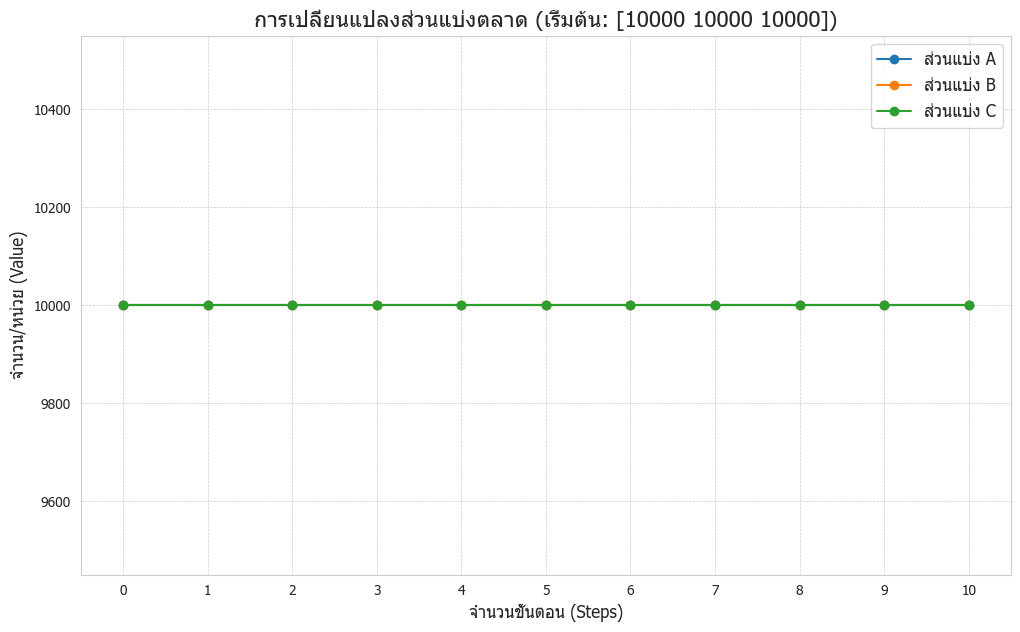

In [22]:
# ==============================================================================
# ### 📈 เซลล์ที่ 1: สภาวะการเปลี่ยนแปลง (Transient State) (แสดงผล LaTeX)
# ==============================================================================
#
# คำนวณการเปลี่ยนแปลงส่วนแบ่งตลาดในแต่ละเดือน (Month-by-Month)
# โดยแสดงผลสมการและเมทริกซ์ด้วย LaTeX

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Math # 👈 **สำคัญ: สำหรับแสดงผล LaTeX**

# --- 1. ตั้งค่าพื้นฐาน (Setup) ---
sns.set_style("whitegrid")
try:
    plt.rcParams["font.family"] = "Tahoma"
except:
    print("ไม่พบฟอนต์ Tahoma, ใช้ฟอนต์เริ่มต้น")

# --- 💡 ฟังก์ชันช่วยแปลง Array เป็น LaTeX ---
def show_latex(latex_string):
    """Helper to display a LaTeX string."""
    display(Math(latex_string))

def to_b(arr):
    """
    แปลง numpy array (1D หรือ 2D) ให้เป็น string ของ LaTeX bmatrix
    ใช้ :g (general format) เพื่อให้แสดงผลทั้งเลข 10000 และ 0.8 ได้สวยงาม
    """
    if arr.ndim == 1:
        arr = np.atleast_2d(arr) # แปลง [a, b] ให้เป็น [[a, b]]
    
    latex = r"\begin{bmatrix}"
    for row in arr:
        # 'g' format ดีที่สุดสำหรับแสดงผลทั้ง int (10000) และ float (0.8)
        latex += " & ".join([f"{x:g}" for x in row])
        latex += r" \\ " # ขึ้นบรรทัดใหม่ใน LaTeX
    
    latex = latex.rstrip(r" \\ ") # ลบ \\ สุดท้าย
    latex += r"\end{bmatrix}"
    return latex
# --- จบฟังก์ชันช่วย ---


# ==============================================================================
# --- 🔧 ค่าที่กำหนดไว้ (Hard-coded values for new problem) ---
# ==============================================================================

states = ["A", "B", "C"]
initial_counts = np.array([10000, 10000, 10000])
# เมทริกซ์การเปลี่ยนสถานะ (P)
P = np.array([
    [0.5, 0.2, 0.3],  # แถวที่ 0: A
    [0.3, 0.5, 0.2],  # แถวที่ 1: B
    [0.2, 0.3, 0.5]   # แถวที่ 2: C
])
# จำนวนขั้นตอน (เดือน/วัน) ที่ต้องการจำลอง
n_steps_to_simulate = 10
# ==============================================================================


print("--- เมทริกซ์การเปลี่ยนสถานะ (P) ---")
show_latex(to_b(P))


# --- 3. การคำนวณ Transient State ---
print("\n" + "="*60)
print("### การคำนวณสภาวะการเปลี่ยนแปลง (Transient State)")
print(f"สถานะเริ่มต้น (ขั้นตอนที่ 0):")
for i, state in enumerate(states):
    print(f"  {state}: {initial_counts[i]} หน่วย")
print(f"จำลองเหตุการณ์ไปข้างหน้า {n_steps_to_simulate} ขั้นตอน...\n")

# สร้าง list เพื่อเก็บประวัติการเปลี่ยนแปลง
history_transient = [initial_counts]
current_v = initial_counts

for step in range(1, n_steps_to_simulate + 1):
    # คำนวณสถานะถัดไป: v_next = v_current * P
    next_v = np.dot(current_v, P)
    
    print(f"--- ขั้นตอนที่ {step} ---")
    
    # --- ✍️ อธิบายการคูณเมทริกซ์ (แบบไดนามิกสำหรับ 3 สถานะ) ---
    if step == 1:
        show_latex(r"\text{--- 💡 อธิบายการคำนวณ (ขั้นตอนที่ 1) ---}")
        
        # สร้างสมการ [v_ปัจจุบัน] x [P] = [v_ถัดไป]
        v_curr_str = to_b(current_v)
        P_str = to_b(P)
        v_next_str = to_b(next_v)
        # ❗️<-- แก้ไขแล้ว: ใช้ f-string (ไม่เติม r)
        show_latex(f"{v_curr_str} \\times {P_str} = {v_next_str}")
        
        show_latex(r"\text{หลักการ: แถว x คอลัมน์ (Row x Column)}")
        
        # --- วนลูปอธิบายการคำนวณสำหรับทุกสถานะ (A, B, C) ---
        for j in range(len(states)): # j คือคอลัมน์ (0=A, 1=B, 2=C)
            show_latex(rf"\text{{การคำนวณหา '{states[j]}' ใหม่ (คอลัมน์ที่ {j+1} ของ P):}}")
            
            s1_parts = []
            s2_parts_calc = []
            for i in range(len(states)): # i คือแถว
                # ❗️<-- แก้ไขแล้ว: ใช้ f-string (ไม่เติม r)
                s1_parts.append(f"({current_v[i]:g} \\times {P[i, j]:g})")
                s2_parts_calc.append(rf"{current_v[i] * P[i, j]:g}")
            
            # สมการเชิงสัญลักษณ์ (10000 * 0.5) + (10000 * 0.3) + (10000 * 0.2)
            show_latex(f"= {' + '.join(s1_parts)}")
            # สมการที่คำนวณแล้ว (5000 + 3000 + 2000) = 10000
            show_latex(rf"= {' + '.join(s2_parts_calc)} = {next_v[j]:g}")

        show_latex(r"\text{----------------------------------------------}")
    
    # --- แสดงผลลัพธ์ (แบบไดนามิก) ---
    print(f"  ผลลัพธ์:")
    for i, state in enumerate(states):
        print(f"    {state} = {next_v[i]:.2f} หน่วย")
        
    # อัปเดตค่าสำหรับรอบถัดไป
    history_transient.append(next_v)
    current_v = next_v

# แปลง history เป็น numpy array สำหรับ plot
history_transient = np.array(history_transient)

# --- 4. การแสดงผลด้วยกราฟ (Visualization) ---
print("\n" + "="*60)
print("### กราฟแสดงการเปลี่ยนแปลง (Transient Plot)")

plt.figure(figsize=(12, 7))

# --- พลอตกราฟ (แบบไดนามิก) ---
for i, state in enumerate(states):
    plt.plot(history_transient[:, i], label=f"ส่วนแบ่ง {state}", marker='o', linestyle='-')

plt.title(f"การเปลี่ยนแปลงส่วนแบ่งตลาด (เริ่มต้น: {initial_counts})", fontsize=16)
plt.xlabel("จำนวนขั้นตอน (Steps)", fontsize=12)
plt.ylabel("จำนวน/หน่วย (Value)", fontsize=12)
plt.xticks(range(n_steps_to_simulate + 1))
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [23]:
# ==============================================================================
# ### ⚖️ เซลล์ที่ 2: สภาวะคงตัว (Steady State) (แสดงผล LaTeX)
# ==============================================================================
#
# คำนวณหาส่วนแบ่งตลาด "ในระยะยาว" หรือ "จุดสมดุล"
# โดยแสดงผลสมการและเมทริกซ์ด้วย LaTeX

import numpy as np
from IPython.display import display, Math # 👈 **สำคัญ: สำหรับแสดงผล LaTeX**

# --- 💡 ฟังก์ชันช่วยแปลง Array เป็น LaTeX ---
def show_latex(latex_string):
    """Helper to display a LaTeX string."""
    display(Math(latex_string))

def to_b(arr):
    """
    แปลง numpy array (1D หรือ 2D) ให้เป็น string ของ LaTeX bmatrix
    ใช้ :g (general format) เพื่อให้แสดงผลทั้งเลข 10000 และ 0.8 ได้สวยงาม
    """
    if arr.ndim == 1:
        arr = np.atleast_2d(arr) 
    
    latex = r"\begin{bmatrix}"
    for row in arr:
        latex += " & ".join([f"{x:g}" for x in row])
        latex += r" \\ " 
    
    latex = latex.rstrip(r" \\ ") 
    latex += r"\end{bmatrix}"
    return latex
# --- จบฟังก์ชันช่วย ---


# ==============================================================================
# --- 🔧 ค่าที่กำหนดไว้ (Hard-coded values for new problem) ---
# ==============================================================================
states = ["A", "B", "C"]
P = np.array([
    [0.5, 0.2, 0.3],  # แถวที่ 0: A
    [0.3, 0.5, 0.2],  # แถวที่ 1: B
    [0.2, 0.3, 0.5]   # แถวที่ 2: C
])
# ยอดรวม (จาก 10000 + 10000 + 10000)
total_customers = 30000
# ==============================================================================

print("--- เมทริกซ์การเปลี่ยนสถานะ (P) ---")
show_latex(to_b(P))
print(f"\nจำนวนลูกค้ารวมในตลาด: {total_customers} คน")
show_latex(r"\text{กำลังค้นหาส่วนแบ่งตลาด } (\pi) \text{ ที่ } \pi = \pi \cdot P")


# --- ✍️ อธิบายการคูณเมทริกซ์ในสภาวะคงตัว (แบบไดนามิก) ---
print("\n" + "="*60)
print("### 💡 อธิบายสมการสภาวะคงตัว (Steady State Equation) ###")
show_latex(r"\text{สมการ } \pi = \pi \cdot P \text{ หมายถึง 'สถานะในอนาคต' = 'สถานะปัจจุบัน'}")

# สร้าง [π_1, π_2, π_3]
pi_vars = [f"\u03C0_{i+1}" for i in range(len(states))] # \u03C0 คือ π
pi_str = rf"\begin{{bmatrix}} {' & '.join(pi_vars)} \end{{bmatrix}}" # เช่น [π_1 & π_2 & π_3]

show_latex(rf"\text{{ถ้าเราให้ }} \pi = {pi_str}")

P_str = to_b(P)
# ❗️<-- แก้ไขแล้ว: ใช้ f-string (ไม่เติม r)
show_latex(f"{pi_str} \\times {P_str} = {pi_str}")

show_latex(r"\text{ซึ่งสามารถแตกเป็นสมการย่อย (จากการคูณเมทริกซ์ 'แถว x คอลัมน์'):}")

# --- วนลูปอธิบายสมการสำหรับทุกสถานะ (A, B, C) ---
for j in range(len(states)): # j คือคอลัมน์
    show_latex(rf"\text{{สมการที่ {j+1} (คอลัมน์ '{states[j]}'):}}")
    
    calc_parts = []
    for i in range(len(states)): # i คือแถว
        # ❗️<-- แก้ไขแล้ว: ใช้ f-string (ไม่เติม r)
        calc_parts.append(f"({pi_vars[i]} \\times {P[i, j]:g})") # e.g., (π_1 * 0.5)
    
    show_latex(f"{' + '.join(calc_parts)} = {pi_vars[j]}")
print("="*60)
# --- จบส่วนอธิบาย ---


# --- 2. การคำนวณ (ใช้วิธี Eigenvector ซึ่งแม่นยำที่สุด) ---
print("\n--- การคำนวณสัดส่วน (Probabilities) โดยใช้ Eigenvector ---")

try:
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    steady_state_index = np.argmin(np.abs(eigenvalues - 1.0))
    pi_vector_unnormalized = eigenvectors[:, steady_state_index]
    pi_vector = np.real(pi_vector_unnormalized / np.sum(pi_vector_unnormalized))

    print(f"สัดส่วนตลาด π (Probabilities) ในสภาวะคงตัว:")
    for i, state in enumerate(states):
        print(f"  π_{state}: {pi_vector[i]:.6f} (หรือ {pi_vector[i]*100:.2f}%)")

    # --- 3. สรุปจำนวนลูกค้าในสภาวะคงตัว ---
    print("\n" + "="*60)
    print("### สรุปจำนวนลูกค้าในสภาวะคงตัว (Steady State)") 

    check_vector_list = []
    for i, state in enumerate(states):
        value = pi_vector[i] * total_customers
        check_vector_list.append(value)
        print(f"  {state}: {value:.2f} คน")
    
    check_vector = np.array(check_vector_list)

    # --- 4. ตรวจสอบคำตอบด้วย LaTeX (แบบไดนามิก) ---
    result_vector = np.dot(check_vector, P)

    print("\n--- ตรวจสอบคำตอบ ( $\pi = \pi \cdot P$ ) ---")
    
    # สร้าง [val1 & val2 & val3] ด้วย .2f
    v_left_str = r"\begin{bmatrix} "
    v_left_str += " & ".join([f"{x:.2f}" for x in check_vector])
    v_left_str += r" \end{bmatrix}"

    v_right_str = r"\begin{bmatrix} "
    v_right_str += " & ".join([f"{x:.2f}" for x in result_vector])
    v_right_str += r" \end{bmatrix}"
    
    # ❗️<-- แก้ไขแล้ว: ใช้ f-string (ไม่เติม r)
    show_latex(f"{v_left_str} \\times {P_str} = {v_right_str}")
    
    if np.allclose(check_vector, result_vector):
        show_latex(r"\text{(ผลลัพธ์ 2 ฝั่งเท่ากัน แสดงว่าถูกต้อง)}")
    else:
        show_latex(r"\text{(ผลลัพธ์ 2 ฝั่งอาจต่างกันเล็กน้อยจากการปัดเศษ)}")

except np.linalg.LinAlgError:
    print("!!! ข้อผิดพลาด: ไม่สามารถคำนวณ Eigenvector ได้ (เมทริกซ์อาจมีปัญหา) !!!")

--- เมทริกซ์การเปลี่ยนสถานะ (P) ---


<>:113: SyntaxWarning: invalid escape sequence '\p'
<>:113: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Admin\AppData\Local\Temp\ipykernel_27964\2973162306.py:113: SyntaxWarning: invalid escape sequence '\p'
  print("\n--- ตรวจสอบคำตอบ ( $\pi = \pi \cdot P$ ) ---")


<IPython.core.display.Math object>


จำนวนลูกค้ารวมในตลาด: 30000 คน


<IPython.core.display.Math object>


### 💡 อธิบายสมการสภาวะคงตัว (Steady State Equation) ###


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


--- การคำนวณสัดส่วน (Probabilities) โดยใช้ Eigenvector ---
สัดส่วนตลาด π (Probabilities) ในสภาวะคงตัว:
  π_A: 0.333333 (หรือ 33.33%)
  π_B: 0.333333 (หรือ 33.33%)
  π_C: 0.333333 (หรือ 33.33%)

### สรุปจำนวนลูกค้าในสภาวะคงตัว (Steady State)
  A: 10000.00 คน
  B: 10000.00 คน
  C: 10000.00 คน

--- ตรวจสอบคำตอบ ( $\pi = \pi \cdot P$ ) ---


<IPython.core.display.Math object>

<IPython.core.display.Math object>